# Lecture 8: Clustering Part 2

#### Step 1: Generate a clustering problem
```
##https://www.naftaliharris.com/blog/visualizing-k-means-clustering/ 
make_blobs from sklearn.datasets

Parameters:
    n_samples:    The total number of points. default=100
    center:       The number of centers (clusters) to generate. default=None
    cluster_std:  The standard deviation of the clusters. default=1.0
    random_state: The random seed. default=None
    
Output:
    X:            Datasets. Each row of X is a 2-D point.
    y_true:       True cluster label for each point. (We aren't using it today.) 
```

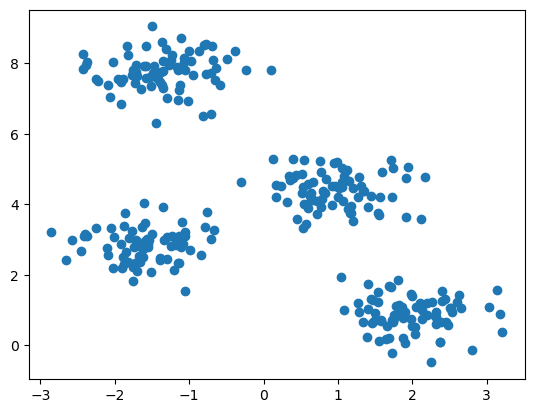

In [11]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.5, random_state=0)

# Plot the dataset X
plt.scatter(X[:, 0], X[:, 1]);

#### Set up *K*-Means Algorithm
```
KMeans from sklearn.cluster

Parameters:
    n_clusters:   The number of clusters, i.e., K. default=8
    n_init:       The number of different initializations to try. default=10 
```

For complete list of parameters, read the offical document website: 
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


C:\Users\jazxh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


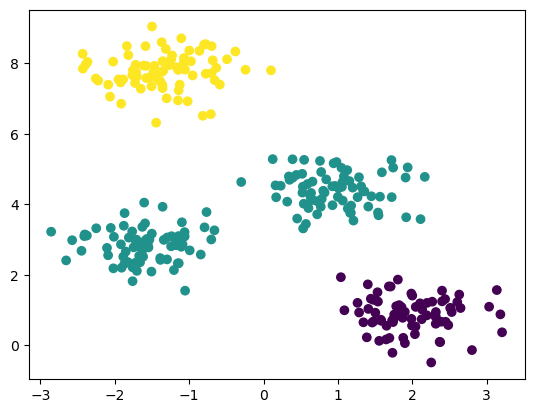

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, n_init=20)

kmeans.fit(X)

# Get predicted cluster label for each point
y_kmeans = kmeans.predict(X)


# Plot the clustering result
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')

#### Step 2: Let's figure out the best value for *K*

C:\Users\jazxh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\jazxh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\jazxh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\jazxh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

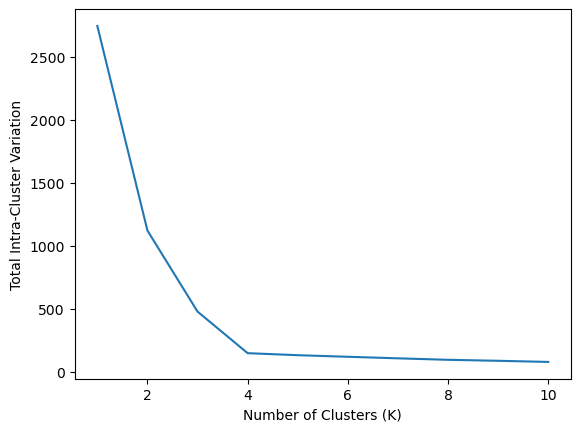

In [17]:
from sklearn.cluster import KMeans

# Record the Total Intra-Cluster Variation
ticv = [] 

for k in range(1,11): 
    kmeans = KMeans(n_clusters=k, n_init=20)

    # Fit kmeans algorithm to the X dataset
    kmeans.fit(X)

    # Record the Total Intra-Cluster Variation for K=k
    ticv.append(kmeans.inertia_)
    

# Plot the elbow graph
plt.plot(range(1,11),ticv)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Total Intra-Cluster Variation')
plt.show()

#### Step 3: Run the *K*-Means with the best value *K* = 4

C:\Users\jazxh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


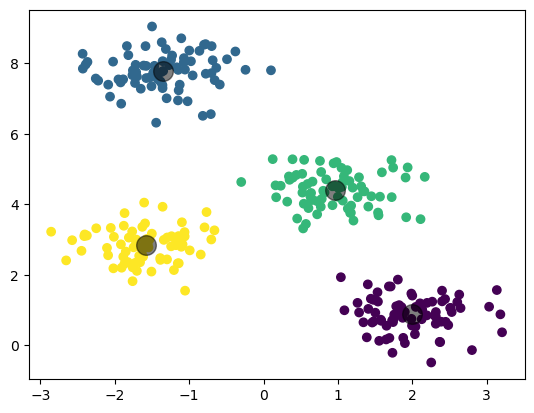

In [20]:
kmeans = KMeans(n_clusters=4, n_init=20)

kmeans.fit(X)

# Get predicted cluster label for each point
y_kmeans = kmeans.predict(X)

# Get the centers of the predicted clusters
centers = kmeans.cluster_centers_

# Plot the clustering result
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);